# Download Data

In [ ]:
# For Google Colab. If not on Colab, make sure kaggle.json is it the right location
from google.colab import files

# upload kaggle.json
uploaded = files.upload()

Saving kaggle.json to kaggle.json


In [ ]:
# move kaggle.json to the right location
!pip install -q kaggle
!ls
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

kaggle.json  sample_data


In [ ]:
# download our dataset using the Kaggle api
!kaggle competitions download home-credit-default-risk -p "home-credit-default-risk"

 75% 73.0M/96.7M [00:01<00:00, 50.9MB/s]
100% 96.7M/96.7M [00:01<00:00, 68.9MB/s]
  0% 0.00/36.5k [00:00<?, ?B/s]
100% 36.5k/36.5k [00:00<00:00, 33.6MB/s]
 47% 17.0M/36.1M [00:01<00:01, 19.3MB/s]
100% 36.1M/36.1M [00:01<00:00, 33.9MB/s]
 90% 98.0M/109M [00:02<00:00, 34.6MB/s]
100% 109M/109M [00:02<00:00, 52.3MB/s] 
 85% 65.0M/76.3M [00:01<00:00, 20.9MB/s]
100% 76.3M/76.3M [00:01<00:00, 56.2MB/s]
 93% 253M/271M [00:06<00:00, 19.3MB/s]
100% 271M/271M [00:06<00:00, 43.8MB/s]
  0% 0.00/524k [00:00<?, ?B/s]
100% 524k/524k [00:00<00:00, 168MB/s]
 90% 33.0M/36.8M [00:01<00:00, 19.9MB/s]
100% 36.8M/36.8M [00:01<00:00, 31.4MB/s]
 86% 5.00M/5.81M [00:00<00:00, 15.0MB/s]
100% 5.81M/5.81M [00:00<00:00, 16.7MB/s]
 58% 33.0M/56.8M [00:01<00:01, 17.6MB/s]
100% 56.8M/56.8M [00:01<00:00, 45.2MB/s]


In [ ]:
import os
import zipfile
import numpy as np
import pandas as pd

zip_ref = zipfile.ZipFile('home-credit-default-risk/application_train.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/application_test.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/bureau_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/bureau.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/credit_card_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/installments_payments.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/POS_CASH_balance.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()
zip_ref = zipfile.ZipFile('home-credit-default-risk/previous_application.csv.zip', 'r')
zip_ref.extractall('datasets')
zip_ref.close()

# Load datasets from files

In [ ]:
import numpy as np
import pandas as pd 
import os
import zipfile
import warnings
warnings.filterwarnings('ignore')

def load_data(in_path, name):
    df = pd.read_csv(in_path)
    print(f"{name}: shape is {df.shape}")
    print(df.info())
    display(df.head(3))
    return df

datasets={}  # lets store the datasets in a dictionary so we can keep track of them easily
DATA_DIR = "datasets" # folder where unzipped files are

ds_names = ("application_train", "application_test", "bureau","bureau_balance","credit_card_balance","installments_payments",
            "previous_application","POS_CASH_balance")

for ds_name in ds_names:
    datasets[ds_name] = load_data(os.path.join(DATA_DIR, f'{ds_name}.csv'), ds_name)
for ds_name in datasets.keys():
    print(f'dataset {ds_name:24}: [ {datasets[ds_name].shape[0]:10,}, {datasets[ds_name].shape[1]}]')

application_train: shape is (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


application_test: shape is (48744, 121)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB
None


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


bureau: shape is (1716428, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN


bureau_balance: shape is (27299925, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C


credit_card_balance: shape is (3840312, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3840312 entries, 0 to 3840311
Data columns (total 23 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   SK_ID_PREV                  int64  
 1   SK_ID_CURR                  int64  
 2   MONTHS_BALANCE              int64  
 3   AMT_BALANCE                 float64
 4   AMT_CREDIT_LIMIT_ACTUAL     int64  
 5   AMT_DRAWINGS_ATM_CURRENT    float64
 6   AMT_DRAWINGS_CURRENT        float64
 7   AMT_DRAWINGS_OTHER_CURRENT  float64
 8   AMT_DRAWINGS_POS_CURRENT    float64
 9   AMT_INST_MIN_REGULARITY     float64
 10  AMT_PAYMENT_CURRENT         float64
 11  AMT_PAYMENT_TOTAL_CURRENT   float64
 12  AMT_RECEIVABLE_PRINCIPAL    float64
 13  AMT_RECIVABLE               float64
 14  AMT_TOTAL_RECEIVABLE        float64
 15  CNT_DRAWINGS_ATM_CURRENT    float64
 16  CNT_DRAWINGS_CURRENT        int64  
 17  CNT_DRAWINGS_OTHER_CURRENT  float64
 18  CNT_DRAWINGS_POS_C

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0


installments_payments: shape is (13605401, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB
None


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000


previous_application: shape is (1670214, 37)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 1

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0


POS_CASH_balance: shape is (10001358, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001358 entries, 0 to 10001357
Data columns (total 8 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SK_ID_PREV             int64  
 1   SK_ID_CURR             int64  
 2   MONTHS_BALANCE         int64  
 3   CNT_INSTALMENT         float64
 4   CNT_INSTALMENT_FUTURE  float64
 5   NAME_CONTRACT_STATUS   object 
 6   SK_DPD                 int64  
 7   SK_DPD_DEF             int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 610.4+ MB
None


,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0


dataset application_train       : [    307,511, 122]
dataset application_test        : [     48,744, 121]
dataset bureau                  : [  1,716,428, 17]
dataset bureau_balance          : [ 27,299,925, 3]
dataset credit_card_balance     : [  3,840,312, 23]
dataset installments_payments   : [ 13,605,401, 8]
dataset previous_application    : [  1,670,214, 37]
dataset POS_CASH_balance        : [ 10,001,358, 8]


In [ ]:
# datasets that we have
datasets.keys()

dict_keys(['application_train', 'application_test', 'bureau', 'bureau_balance', 'credit_card_balance', 'installments_payments', 'previous_application', 'POS_CASH_balance'])

# Analyze Application data

Since our application data is easily accessible, we should examine it first

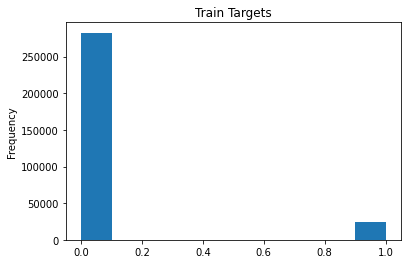

In [ ]:
datasets["application_train"]['TARGET'].astype(int).plot.hist(title="Train Targets")

Our dataset is really heavily unbalanced. This will make it harder to visually see relationships between data and targets

In [ ]:
correlations = datasets["application_train"].corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_DOCUMENT_3                0.044346
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_EMPLOYED                -0.044932
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
Name: TARGET, dtype: float64


In [ ]:
all_cat_features = [
  "NAME_CONTRACT_TYPE", "CODE_GENDER", "FLAG_OWN_CAR", "NAME_TYPE_SUITE",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS", "NAME_HOUSING_TYPE",
  "FLAG_MOBIL", "FLAG_EMP_PHONE", "FLAG_WORK_PHONE", "FLAG_CONT_MOBILE",
  "FLAG_PHONE", "FLAG_EMAIL", "OCCUPATION_TYPE", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "WEEKDAY_APPR_PROCESS_START", "REG_REGION_NOT_LIVE_REGION", "REG_REGION_NOT_WORK_REGION",
  "LIVE_REGION_NOT_WORK_REGION", "REG_CITY_NOT_LIVE_CITY", "REG_CITY_NOT_WORK_CITY",
  "LIVE_CITY_NOT_WORK_CITY", "ORGANIZATION_TYPE", "FONDKAPREMONT_MODE", "HOUSETYPE_MODE",
  "WALLSMATERIAL_MODE", "EMERGENCYSTATE_MODE", "FLAG_DOCUMENT_2", "FLAG_DOCUMENT_3",
  "FLAG_DOCUMENT_4", "FLAG_DOCUMENT_5", "FLAG_DOCUMENT_6", "FLAG_DOCUMENT_7", "FLAG_DOCUMENT_8",
  "FLAG_DOCUMENT_9", "FLAG_DOCUMENT_10", "FLAG_DOCUMENT_11", "FLAG_DOCUMENT_12", "FLAG_DOCUMENT_13",
  "FLAG_DOCUMENT_14", "FLAG_DOCUMENT_15", "FLAG_DOCUMENT_16", "FLAG_DOCUMENT_17",
  "FLAG_DOCUMENT_18", "FLAG_DOCUMENT_19", "FLAG_DOCUMENT_20", "FLAG_DOCUMENT_21",
  "HOUR_APPR_PROCESS_START"
]
all_num_features = [
  "CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "REGION_POPULATION_RELATIVE",
  "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "OWN_CAR_AGE", "CNT_FAM_MEMBERS",
  "EXT_SOURCE_1", "EXT_SOURCE_2", "EXT_SOURCE_3", "APARTMENTS_AVG", "AMT_GOODS_PRICE",
  "BASEMENTAREA_AVG", "YEARS_BEGINEXPLUATATION_AVG", "YEARS_BUILD_AVG", "COMMONAREA_AVG",
  "ELEVATORS_AVG", "ENTRANCES_AVG", "FLOORSMAX_AVG", "FLOORSMIN_AVG", "LANDAREA_AVG",
  "LIVINGAPARTMENTS_AVG", "LIVINGAREA_AVG", "NONLIVINGAPARTMENTS_AVG", "NONLIVINGAREA_AVG",
  "APARTMENTS_MODE", "BASEMENTAREA_MODE", "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BUILD_MODE",
  "COMMONAREA_MODE", "ELEVATORS_MODE", "ENTRANCES_MODE", "FLOORSMAX_MODE", "FLOORSMIN_MODE",
  "LANDAREA_MODE", "LIVINGAPARTMENTS_MODE", "LIVINGAREA_MODE", "NONLIVINGAPARTMENTS_MODE",
  "NONLIVINGAREA_MODE", "APARTMENTS_MEDI", "BASEMENTAREA_MEDI", "YEARS_BEGINEXPLUATATION_MEDI",
  "YEARS_BUILD_MEDI", "COMMONAREA_MEDI", "ELEVATORS_MEDI", "ENTRANCES_MEDI", "FLOORSMAX_MEDI",
  "FLOORSMIN_MEDI", "LANDAREA_MEDI", "LIVINGAPARTMENTS_MEDI", "LIVINGAREA_MEDI",
  "NONLIVINGAPARTMENTS_MEDI", "NONLIVINGAREA_MEDI", "TOTALAREA_MODE", "OBS_30_CNT_SOCIAL_CIRCLE",
  "DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE",
  "DAYS_LAST_PHONE_CHANGE", "AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY",
  "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT",
  "AMT_REQ_CREDIT_BUREAU_YEAR", "DAYS_ID_PUBLISH",
]

## Analysis of Categorical Features

Let's see if there's any interesting visual correlations between the categorical features and the target. NOTE: the below graphs are in percentages, not in absolute terms. This makes it much easier to see the difference in percentages as opposed to the absolute differences

Let's take a look at our most correlated features first.

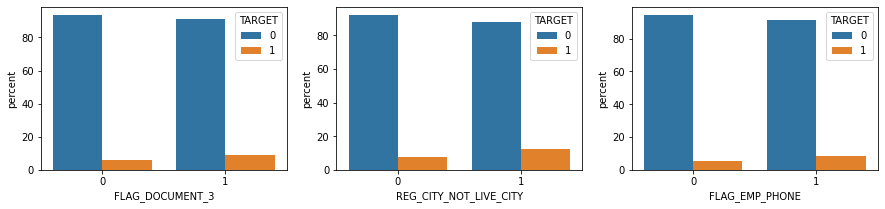

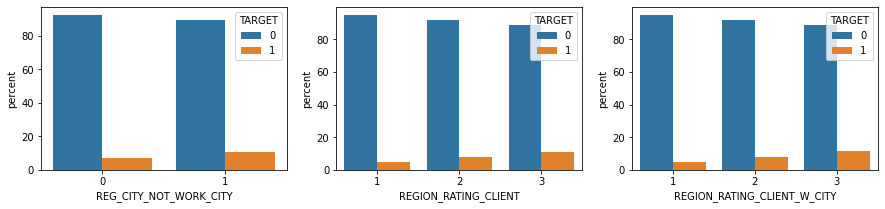

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cat_corr_features1 = [
  "FLAG_DOCUMENT_3", "REG_CITY_NOT_LIVE_CITY", "FLAG_EMP_PHONE",
]

cat_corr_features2 = [
  "REG_CITY_NOT_WORK_CITY", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY", 
]

app_train_df = datasets['application_train']
fig = plt.figure(figsize=(15,3))
for idx, cat in enumerate(cat_corr_features1):
  df = app_train_df.groupby(cat)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  ax = fig.add_subplot(int("13{}".format(idx+1)))
  sns.barplot(x=cat,y='percent',hue='TARGET',data=df,ax=ax)

fig = plt.figure(figsize=(15,3))
for idx, cat in enumerate(cat_corr_features2):
  df = app_train_df.groupby(cat)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  ax = fig.add_subplot(int("13{}".format(idx+1)))
  sns.barplot(x=cat,y='percent',hue='TARGET',data=df,ax=ax)

The most obvious splits here seem to be `REGION_RATING_CLIENT` and `REG_CITY_NOT_WORK_CITY`, just from visual inspection. However, it appears that there are no obvious splits that can be made from just visually inspecting the histogram, even on our most correlated fields.

Let's look at some more interesting fields

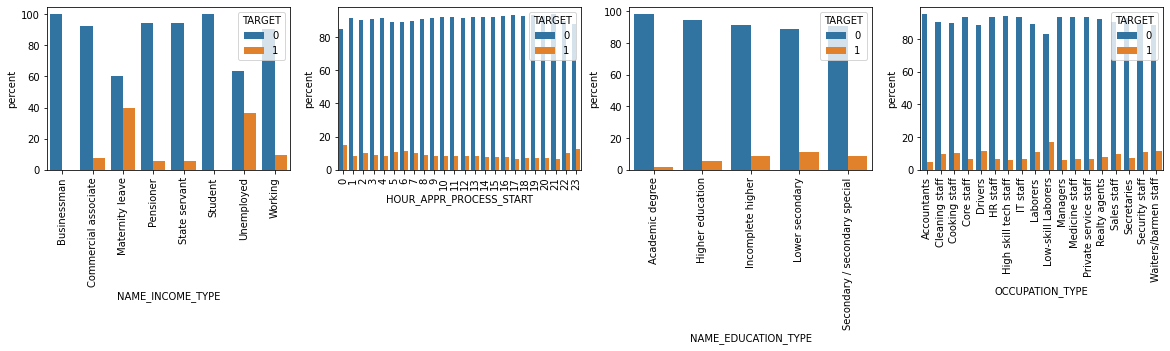

In [ ]:
cat_corr_features_i = [
  "NAME_INCOME_TYPE", "HOUR_APPR_PROCESS_START", "NAME_EDUCATION_TYPE", "OCCUPATION_TYPE"
]

app_train_df = datasets['application_train']
fig = plt.figure(figsize=(20,3))
for idx, cat in enumerate(cat_corr_features_i):
  df = app_train_df.groupby(cat)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  ax = fig.add_subplot(int("14{}".format(idx+1)))
  plt.xticks(rotation=90)
  sns.barplot(x=cat,y='percent',hue='TARGET',data=df,ax=ax)

We see a number of interesting things here.

According to `NAME_INCOME_TYPE`, Businessmen and Students almost never have problems with repayment, while those on maternity leave or unemployed are more likely to have difficulty repaying the loan.

According to `HOUR_APPR_PROCESS_START`, Those that file extremely late/early in the day have more issues repaying as well. This trend goes down throughout the afternoon, but picks up again at around 11pm. There appears to be a noticeable dip at around 6pm, perhaps this is because people that work a 9-5 would normally start their application after work hours.

`NAME_EDUCATION_TYPE` also shows some clear trends. The more educated the person applying for the loan, the more difficulty they are expected to have repaying it. This is interesting, as according to `NAME_INCOME_TYPE`, Students almost never have problem repaying.

Lastly, `OCCUPATION_TYPE` shows some trends. The most likely to have problems in repayment are Low-skill Laborers and the least likely are Accountants. Drivers, Laborers, and Waiters/barmen staff also tend to have more problems with repayment than average. 

### Missing Values

In [ ]:
df = datasets['application_train'][all_cat_features]
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df.isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data.head(8)

,Percent,Missing Count
FONDKAPREMONT_MODE,68.39,210295
WALLSMATERIAL_MODE,50.84,156341
HOUSETYPE_MODE,50.18,154297
EMERGENCYSTATE_MODE,47.40,145755
OCCUPATION_TYPE,31.35,96391
NAME_TYPE_SUITE,0.42,1292
HOUR_APPR_PROCESS_START,0.00,0
FLAG_EMAIL,0.00,0


Only a few features are missing, and all of them don't seem very interesting except for `OCCUPATION_TYPE`. However, since unemployment wasn't listed, this is most-likely why.

## Analysis of Numerical Features

Now that we've looked at our categorical features, let's turn our attention to the numerical features. Let's take a look at the most correlated features first.

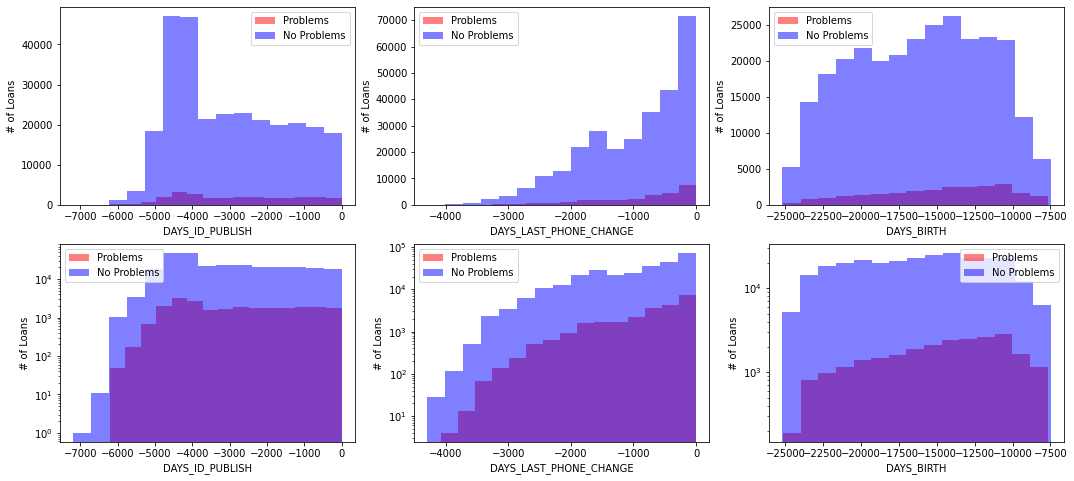

In [ ]:
def target_hist(y, ax, log=False):
  if log: ax.set_yscale('log')
  df = datasets['application_train']

  ax.hist(df[df["TARGET"]==1][y], bins=15, alpha=0.5, color="red", label="Problems")
  ax.hist(df[df["TARGET"]==0][y], bins=15, alpha=0.5, color="blue", label="No Problems")

  ax.set_xlabel(y)
  ax.set_ylabel("# of Loans")
  ax.legend()

fig, axs = plt.subplots(2, 3, figsize=(18, 8))
target_hist("DAYS_ID_PUBLISH", axs[0,0])
target_hist("DAYS_LAST_PHONE_CHANGE", axs[0,1])
target_hist("DAYS_BIRTH", axs[0,2])
# log graphs
target_hist("DAYS_ID_PUBLISH", axs[1,0], True)
target_hist("DAYS_LAST_PHONE_CHANGE", axs[1,1], True)
target_hist("DAYS_BIRTH", axs[1,2], True)

NOTE: these are the linear and log graphs for 3 different features. The log graph is directly below the linear one and is to help reading and interpreting the data

There are some interesing features here. It seems that the more recently the client changed their phone the more likely that there will be problems with repayment.

The age of the client also has some interesting features. The most problems seem to happen when the client is around 11,000 days old, or around 30 years old. The older or younger they are, the more capable they are of being able to repay the loan.

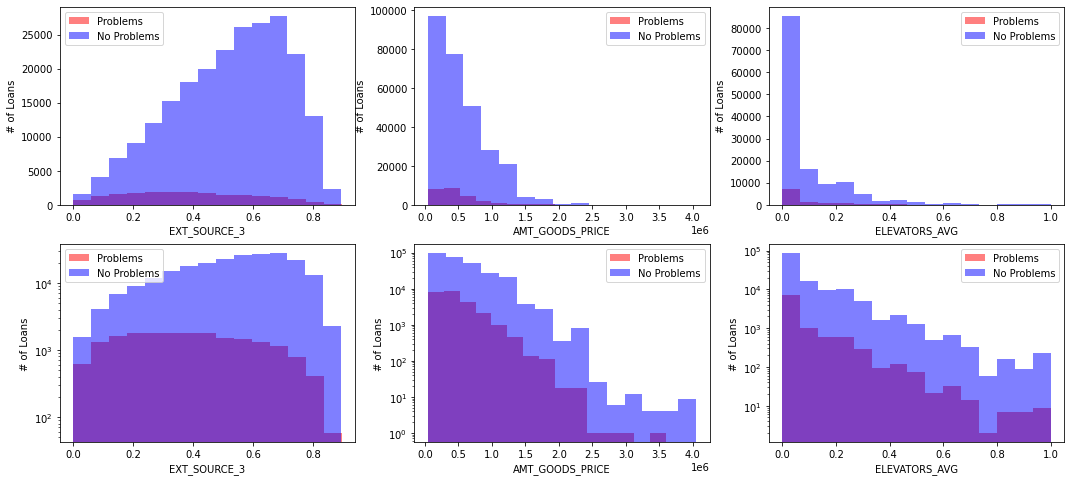

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
target_hist("EXT_SOURCE_3", axs[0,0])
target_hist("AMT_GOODS_PRICE", axs[0,1])
target_hist("ELEVATORS_AVG", axs[0,2])
# log
target_hist("EXT_SOURCE_3", axs[1,0], True)
target_hist("AMT_GOODS_PRICE", axs[1,1], True)
target_hist("ELEVATORS_AVG", axs[1,2], True)

`EXT_SOURCE_3` was the most negatively-corrolated data field. It's data from an external source with no specific labels, so it's not very interesting in terms of making intuitive connections.

`AMT_GOODS_PRICE` is very negatively corrolated with repayment problems. The description on this is vague, but perhaps this refers to the collateral on the loan.

Interestingly, according to `ELEVATORS_AVG`, the more elevators that the building where the client lives has, the more likely they are to have problems repaying the loan. The number of floors is also highly correlated with the target, so it probably is related to rent price or neighborhood quality.

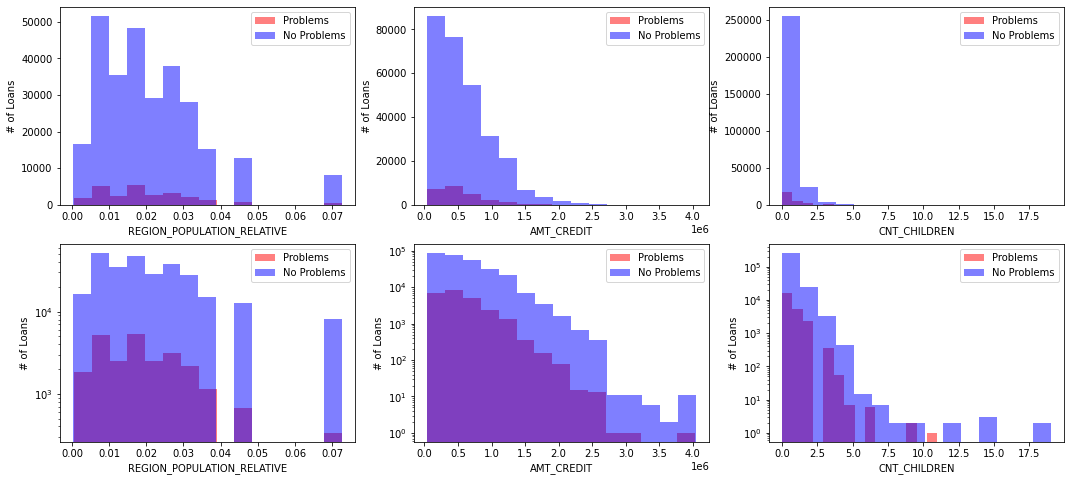

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(18, 8))
target_hist("REGION_POPULATION_RELATIVE", axs[0,0])
target_hist("AMT_CREDIT", axs[0,1])
target_hist("CNT_CHILDREN", axs[0,2])
# log graphs
target_hist("REGION_POPULATION_RELATIVE", axs[1,0], True)
target_hist("AMT_CREDIT", axs[1,1], True)
target_hist("CNT_CHILDREN", axs[1,2], True)

It seems that the higher the population where the client lives, the more successfully they can repay the loan. This might be due to the fact that it's more expensive to live in more populus areas.

We see that the more a person want to take as credit on a loan, the less problems they tend to have repaying it.

Also, the more children the client has, the harder it is for them to repay the loan without issues.

### Missing Values

In [ ]:
df = datasets['application_train'][all_num_features]
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
sum_missing = df.isna().sum().sort_values(ascending = False)
missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
missing_data.head(54)

,Percent,Missing Count
COMMONAREA_MODE,69.87,214865
COMMONAREA_MEDI,69.87,214865
COMMONAREA_AVG,69.87,214865
NONLIVINGAPARTMENTS_MODE,69.43,213514
NONLIVINGAPARTMENTS_AVG,69.43,213514
NONLIVINGAPARTMENTS_MEDI,69.43,213514
LIVINGAPARTMENTS_AVG,68.35,210199
LIVINGAPARTMENTS_MODE,68.35,210199
LIVINGAPARTMENTS_MEDI,68.35,210199
FLOORSMIN_MODE,67.85,208642


Unfortunately, a lot of interesting features are missing in half or more of our data. Ideally, we'd like to avoid depending on this data.

`EXT_SOURCE_1` is highly corrolated with the target, as was information about the floors the client's house/apartment, but since it's missing in around half the rows, there might be a large bias to this type of data.

`EXT_SOURCE_3` is also missing in around 20% of the rows, which is pretty bad.

## Pipeline for just Application Data

Let's create a basic model with just applicaiton data

In [246]:
results = pd.DataFrame(columns=["ExpID", "ROC AUC Score", "Cross fold train accuracy", "Test Accuracy", "Train Time(s)", "Test Time(s)", "Experiment description"])


In [250]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE"
]

num_features = [
  "EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH"
]

In [252]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values
def pct(x):
    return round(100*x,1)
num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])

##Fit Baseline

In [253]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from time import time
X_train = datasets["application_train"].loc[:, datasets['application_train'].columns != "TARGET"]
y_train = datasets["application_train"]['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
np.random.seed(42)

cv30Splits = ShuffleSplit(n_splits = 30, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv30Splits.split(X_train))                

logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)


In [254]:
results.loc[0] = ["Baseline", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "Untuned LogisticRegression"]

In [255]:
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,178.7383,0.3048,Untuned LogisticRegression


Of course, this score isn't very good. In the Kaggle competition, it would place us 5773 out of 7176 entries. However, it's a good baseline to evaluate our future models on

# Analyze Secondary Data

In order to improve our model, we should look at all the other data we have available. To do that, we need to aggregate data from sources besides the application files

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# some generalized functions to make the analysis easy on us
def cat_bar(df, x, ax):
  df2 = df.groupby(x)['TARGET'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
  sns.barplot(x=x,y='percent',hue='TARGET',data=df2,ax=ax)

def num_hist(df, y, ax, log=False):
  if log: ax.set_yscale('log')

  ax.hist(df[df["TARGET"]==1][y], bins=15, alpha=0.5, color="red", label="Problems")
  ax.hist(df[df["TARGET"]==0][y], bins=15, alpha=0.5, color="blue", label="No Problems")

  ax.set_xlabel(y)
  ax.set_ylabel("# of Loans")
  ax.legend()

def missing_vals(df):
  percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False).round(2)
  sum_missing = df.isna().sum().sort_values(ascending = False)
  missing_data  = pd.concat([percent, sum_missing], axis=1, keys=['Percent', "Missing Count"])
  return missing_data.head(10)

## Credit Card Balances

This dataset is month-to-month credit card balances, with one row being one month

In [ ]:
datasets['credit_card_balance'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'AMT_BALANCE',
       'AMT_CREDIT_LIMIT_ACTUAL', 'AMT_DRAWINGS_ATM_CURRENT',
       'AMT_DRAWINGS_CURRENT', 'AMT_DRAWINGS_OTHER_CURRENT',
       'AMT_DRAWINGS_POS_CURRENT', 'AMT_INST_MIN_REGULARITY',
       'AMT_PAYMENT_CURRENT', 'AMT_PAYMENT_TOTAL_CURRENT',
       'AMT_RECEIVABLE_PRINCIPAL', 'AMT_RECIVABLE', 'AMT_TOTAL_RECEIVABLE',
       'CNT_DRAWINGS_ATM_CURRENT', 'CNT_DRAWINGS_CURRENT',
       'CNT_DRAWINGS_OTHER_CURRENT', 'CNT_DRAWINGS_POS_CURRENT',
       'CNT_INSTALMENT_MATURE_CUM', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [218]:
datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
CCB_df = datasets['credit_card_balance'].groupby('SK_ID_CURR').agg({
    "AMT_BALANCE":["mean"],
    "MONTHS_BALANCE": ["min"],
    "AMT_CREDIT_LIMIT_ACTUAL": ["max", "count"],
    "CNT_INSTALMENT_MATURE_CUM": ["max"],
    "AMT_PAYMENT_CURRENT": ["mean"]
})

CCB_df[("AMT_PAYMENT_CURRENT", "mean")].fillna(value=0, inplace=True)
CCB_df['Payment_balance_ratio'] = CCB_df[("AMT_PAYMENT_CURRENT", "mean")] / (CCB_df[("AMT_BALANCE", "mean")]+1)

In [ ]:
temp_app = datasets['application_train'].merge(CCB_df, how='left', on='SK_ID_CURR')

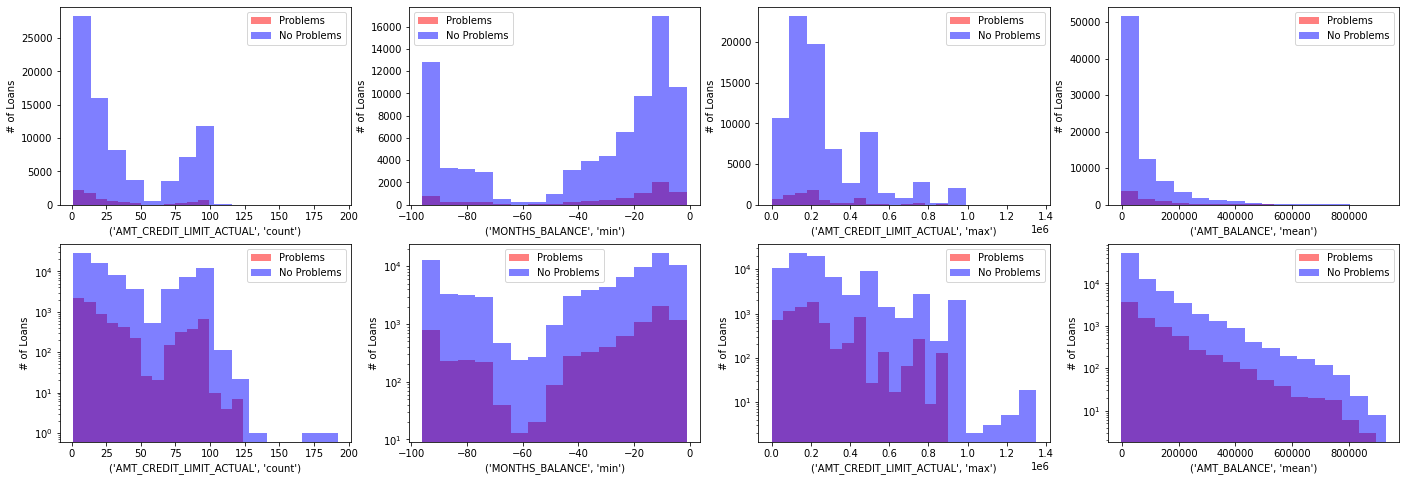

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(temp_app, ('AMT_CREDIT_LIMIT_ACTUAL', 'count'), axs[0,0])
num_hist(temp_app, ('MONTHS_BALANCE', 'min'), axs[0,1])
num_hist(temp_app, ('AMT_CREDIT_LIMIT_ACTUAL', 'max'), axs[0,2])
num_hist(temp_app, ('AMT_BALANCE', 'mean'), axs[0,3])
# log graphs
num_hist(temp_app, ('AMT_CREDIT_LIMIT_ACTUAL', 'count'), axs[1,0], True)
num_hist(temp_app, ('MONTHS_BALANCE', 'min'), axs[1,1], True)
num_hist(temp_app, ('AMT_CREDIT_LIMIT_ACTUAL', 'max'), axs[1,2], True)
num_hist(temp_app, ('AMT_BALANCE', 'mean'), axs[1,3], True)

It seems that clients with the highest credit limit have very few problems with repayment, which should be expected. The number of credit card balances seems to have a sort of 'U' shape. The few people at the extreme high end have no problems paying the loan, however.

It's hard to tell, but `AMT_BALANCE` might have some correlation with the target as well

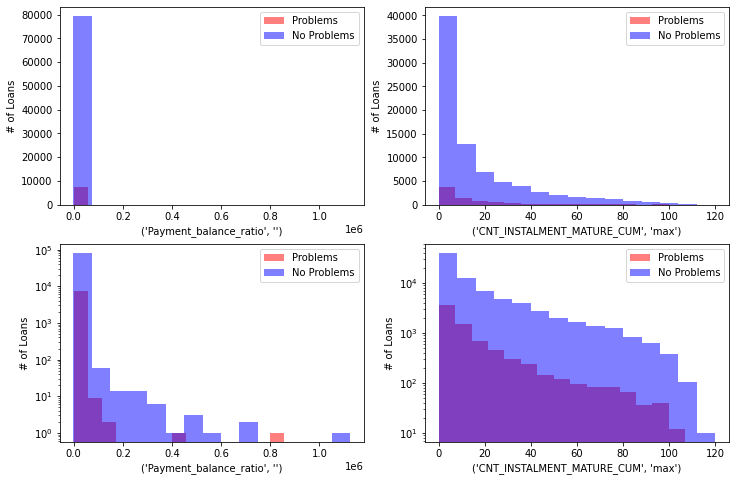

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
num_hist(temp_app, ("Payment_balance_ratio", ''), axs[0,0])
num_hist(temp_app, ('CNT_INSTALMENT_MATURE_CUM', 'max'), axs[0,1])
# log graphs
num_hist(temp_app, ("Payment_balance_ratio", ''), axs[1,0], True)
num_hist(temp_app, ('CNT_INSTALMENT_MATURE_CUM', 'max'), axs[1,1], True)

It looks like `Payment_balance_ratio` is all concentrated around 0.0, so it hardly has any predictive power.

`CNT_INSTALMENT_MATURE_CUM` seems to have pretty good correlation, which makes sense. The more installments the client pays on their credit card, the less likely they are to have problems with a loan.

### Correlations

In [ ]:
temp_app[list(CCB_df.columns) + ["TARGET"]].corr()["TARGET"]

(AMT_BALANCE, mean)                 0.087177
(MONTHS_BALANCE, min)               0.061359
(AMT_CREDIT_LIMIT_ACTUAL, max)     -0.011679
(AMT_CREDIT_LIMIT_ACTUAL, count)   -0.060481
(CNT_INSTALMENT_MATURE_CUM, max)   -0.017568
(AMT_PAYMENT_CURRENT, mean)         0.028224
(Payment_balance_ratio, )           0.000719
TARGET                              1.000000
Name: TARGET, dtype: float64

These are some strong correlation values. `AMT_BALANCE` refers to the balance on the credit card, so it makes sense that the higher the balance, the harder it will be to repay a loan. The closer to the time of application as the balance is due `MONTHS_BALANCE`, the harder it is to repay as well.

### Missing Values

In [ ]:
missing_vals(temp_app[CCB_df.columns])

,Percent,Missing Count
"(Payment_balance_ratio, )",71.74,220606
"(AMT_PAYMENT_CURRENT, mean)",71.74,220606
"(CNT_INSTALMENT_MATURE_CUM, max)",71.74,220606
"(AMT_CREDIT_LIMIT_ACTUAL, count)",71.74,220606
"(AMT_CREDIT_LIMIT_ACTUAL, max)",71.74,220606
"(MONTHS_BALANCE, min)",71.74,220606
"(AMT_BALANCE, mean)",71.74,220606


Unfortunately, our highly correlated features have a lot of missing values. We might not be able to use these, since it only has predictive power in ~28% of the dataset.

## Previous Applications

In [ ]:
datasets['previous_application'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [217]:
datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
PA_df = datasets['previous_application'].groupby('SK_ID_CURR').agg({
    "AMT_APPLICATION": ["mean", "count"],
    "NAME_CONTRACT_STATUS": "max",
    "NAME_CLIENT_TYPE": "max",
    "NAME_YIELD_GROUP": "max",
    "DAYS_TERMINATION":"mean",

    "NAME_PORTFOLIO": "max",
    "NAME_GOODS_CATEGORY": "max",
    "NAME_SELLER_INDUSTRY": "max",
    "CNT_PAYMENT": "max",
})

In [ ]:
temp_app = datasets['application_train'].merge(PA_df, how='left', on='SK_ID_CURR')

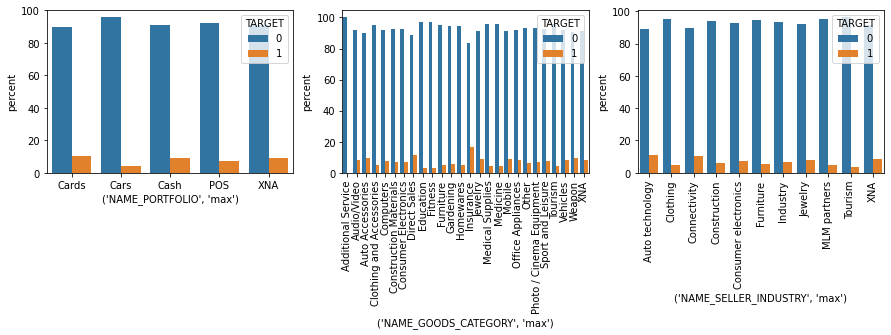

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cat_bar(temp_app, ('NAME_PORTFOLIO', 'max'), axs[0])
cat_bar(temp_app, ('NAME_GOODS_CATEGORY', 'max'), axs[1])
cat_bar(temp_app, ('NAME_SELLER_INDUSTRY', 'max'), axs[2])

for tick in axs[1].get_xticklabels():
  tick.set_rotation(90)
for tick in axs[2].get_xticklabels():
  tick.set_rotation(90)

There's a lot of interesting points here. The `NAME_GOODS_CATEGORY` seems to really matter. 'Education', 'Fitness', and 'Tourism' have the least amount of repayment problems, while 'Insurance', 'Direct Sales', and 'Weapon' have some of the highest rates of problems.

In `NAME_PRODUCT_TYPE`, walk-ins have higher rates of problems than the other two, which could be interesting.

In `NAME_PORTFOLIO`, Car loans seem to have the least amount of problems, which is interesting. Cards have the highest rate

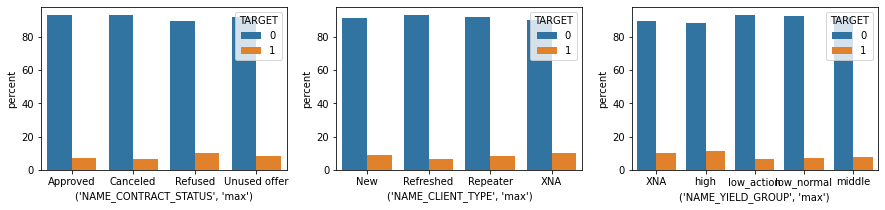

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(15, 3))
cat_bar(temp_app, ('NAME_CONTRACT_STATUS', 'max'), axs[0])
cat_bar(temp_app, ('NAME_CLIENT_TYPE', 'max'), axs[1])
cat_bar(temp_app, ('NAME_YIELD_GROUP', 'max'), axs[2])

Although there's not a whole lot of variance in general, a few things stick out here. In `NAME_CONTRACT_STATUS`, the Refused clients have a higher probability of having payment issues.

In `NAME_CLIENT_TYPE`, 'Refreshed' clients have a lower probability of having problems.

In `NAME_YIELD_GROUP`, the low-yield clients have the fewest amount of problems, and 'XNA' and 'high' yield groups have the most amount of problems.

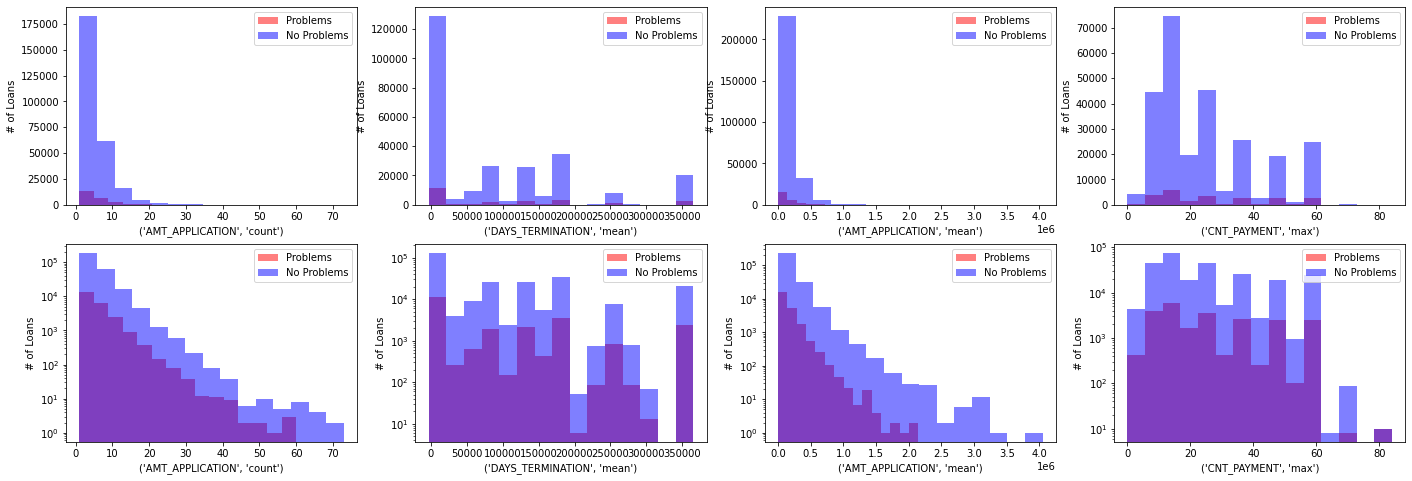

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(temp_app, ('AMT_APPLICATION', 'count'), axs[0,0])
num_hist(temp_app, ('DAYS_TERMINATION', 'mean'), axs[0,1])
num_hist(temp_app, ('AMT_APPLICATION', 'mean'), axs[0,2])
num_hist(temp_app, ('CNT_PAYMENT', 'max'), axs[0,3])
# log graphs
num_hist(temp_app, ('AMT_APPLICATION', 'count'), axs[1,0], True)
num_hist(temp_app, ('DAYS_TERMINATION', 'mean'), axs[1,1], True)
num_hist(temp_app, ('AMT_APPLICATION', 'mean'), axs[1,2], True)
num_hist(temp_app, ('CNT_PAYMENT', 'max'), axs[1,3], True)

Although it's hard to see, it looks like clients with more applications and that request higher amounts tend to have more issues with repayment, although the difference seems small

### Correlations

In [ ]:
temp_app[list(PA_df.columns) + ["TARGET"]].corr()["TARGET"]

(AMT_APPLICATION, mean)    -0.021803
(AMT_APPLICATION, count)    0.019762
(DAYS_TERMINATION, mean)    0.025795
(CNT_PAYMENT, max)          0.029439
TARGET                      1.000000
Name: TARGET, dtype: float64

The correlations aren't great, but it's really the categories that look promising here

### Missing Values

In [ ]:
missing_vals(temp_app[PA_df.columns])

,Percent,Missing Count
"(DAYS_TERMINATION, mean)",5.77,17751
"(CNT_PAYMENT, max)",5.49,16869
"(NAME_SELLER_INDUSTRY, max)",5.35,16454
"(NAME_GOODS_CATEGORY, max)",5.35,16454
"(NAME_PORTFOLIO, max)",5.35,16454
"(NAME_YIELD_GROUP, max)",5.35,16454
"(NAME_CLIENT_TYPE, max)",5.35,16454
"(NAME_CONTRACT_STATUS, max)",5.35,16454
"(AMT_APPLICATION, count)",5.35,16454
"(AMT_APPLICATION, mean)",5.35,16454


There's not a lot of missing data here, so we're safe to use these in our model without worrying too much about it

##POS Cash Balance

In [210]:
datasets['POS_CASH_balance'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'MONTHS_BALANCE', 'CNT_INSTALMENT',
       'CNT_INSTALMENT_FUTURE', 'NAME_CONTRACT_STATUS', 'SK_DPD',
       'SK_DPD_DEF'],
      dtype='object')

In [216]:
datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
PCB_df = datasets['POS_CASH_balance'].groupby('SK_ID_CURR').agg({
    "CNT_INSTALMENT": ["count"],
    "CNT_INSTALMENT_FUTURE":["max", "min", "mean"],
    "MONTHS_BALANCE":["max","min", "mean"],

})

In [ ]:
temp_app = datasets['application_train'].merge(PCB_df, how='left', on='SK_ID_CURR')

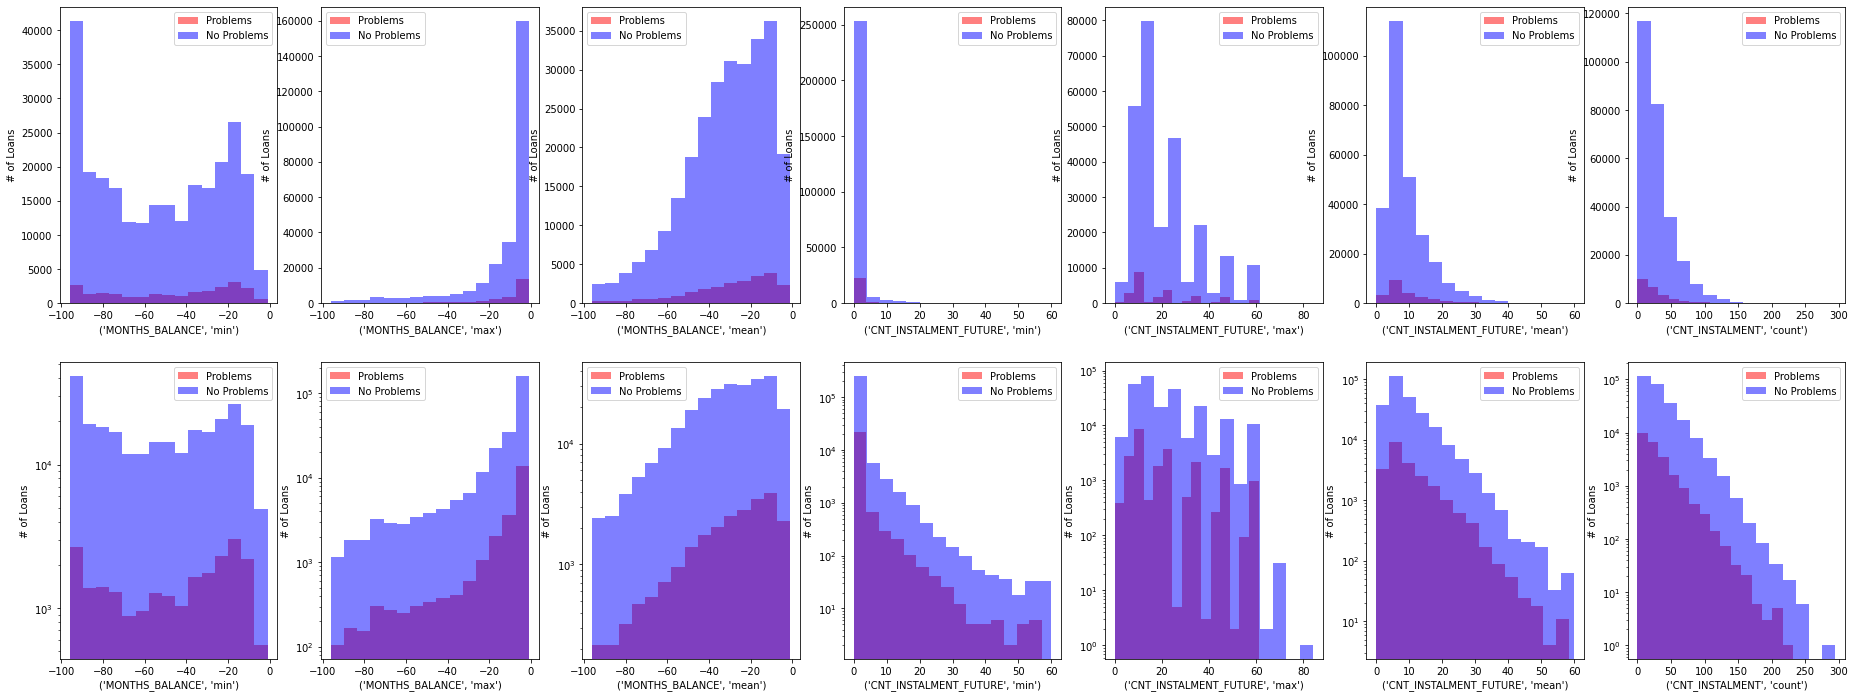

In [ ]:
fig, axs = plt.subplots(2, 7, figsize=(32, 12))
num_hist(temp_app, ("MONTHS_BALANCE", 'min'), axs[0,0])
num_hist(temp_app, ("MONTHS_BALANCE", 'max'), axs[0,1])
num_hist(temp_app, ("MONTHS_BALANCE", 'mean'), axs[0,2])
num_hist(temp_app, ("CNT_INSTALMENT_FUTURE", 'min'), axs[0,3])
num_hist(temp_app, ("CNT_INSTALMENT_FUTURE", 'max'), axs[0,4])
num_hist(temp_app, ("CNT_INSTALMENT_FUTURE", 'mean'), axs[0,5])
num_hist(temp_app, ('CNT_INSTALMENT', 'count'), axs[0,6])
# log graphs
num_hist(temp_app, ("MONTHS_BALANCE", 'min'), axs[1,0], True)
num_hist(temp_app, ("MONTHS_BALANCE", 'max'), axs[1,1], True)
num_hist(temp_app, ("MONTHS_BALANCE", 'mean'), axs[1,2], True)
num_hist(temp_app, ("CNT_INSTALMENT_FUTURE", 'min'), axs[1,3], True)
num_hist(temp_app, ("CNT_INSTALMENT_FUTURE", 'max'), axs[1,4], True)
num_hist(temp_app, ("CNT_INSTALMENT_FUTURE", 'mean'), axs[1,5], True)
num_hist(temp_app, ('CNT_INSTALMENT', 'count'), axs[1,6], True)

MONTHS_BALANCE, min is very vaguely "U" shaped, though the differenece in problems to no problems is uniform throughout. Most of these graphs don't look like the difference between problems and no problems change very much, though CNT_INSTALMENT_FUTURE, max is very sporadic. 

### Correlations

In [ ]:
temp_app[list(PCB_df.columns) + ["TARGET"]].corr()["TARGET"]

(CNT_INSTALMENT, count)         -0.035802
(CNT_INSTALMENT_FUTURE, max)     0.013324
(CNT_INSTALMENT_FUTURE, min)     0.019010
(CNT_INSTALMENT_FUTURE, mean)    0.027827
(MONTHS_BALANCE, max)           -0.004321
(MONTHS_BALANCE, min)            0.055307
(MONTHS_BALANCE, mean)           0.034543
(SK_DPD, max)                    0.004763
(SK_DPD, min)                    0.005444
(SK_DPD, mean)                   0.005436
TARGET                           1.000000
Name: TARGET, dtype: float64

As we can see, the best feature from these is (MONTHS_BALANCE, min), though it is not as high of a correlation as in other datasets. 

###Missing Values

In [ ]:
missing_vals(temp_app[PCB_df.columns])

,Percent,Missing Count
"(CNT_INSTALMENT_FUTURE, mean)",5.88,18091
"(CNT_INSTALMENT_FUTURE, min)",5.88,18091
"(CNT_INSTALMENT_FUTURE, max)",5.88,18091
"(MONTHS_BALANCE, mean)",5.88,18067
"(MONTHS_BALANCE, min)",5.88,18067
"(MONTHS_BALANCE, max)",5.88,18067
"(CNT_INSTALMENT, count)",5.88,18067


There are a relatively low amount of misssing values here.

##Instalments Payments

In [215]:
datasets['installments_payments'].columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NUM_INSTALMENT_VERSION',
       'NUM_INSTALMENT_NUMBER', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT',
       'AMT_INSTALMENT', 'AMT_PAYMENT'],
      dtype='object')

In [214]:

datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
IP_df = datasets['installments_payments'].groupby('SK_ID_CURR').agg({
    "NUM_INSTALMENT_NUMBER":["max","min", "mean", "count"],
    "DAYS_INSTALMENT":["max","min", "mean"],
    "DAYS_ENTRY_PAYMENT":["max","min", "mean"],
    "AMT_INSTALMENT":["sum"],
    "AMT_PAYMENT":["sum"]
})
IP_df["SUM_MISSED"] = IP_df[("AMT_INSTALMENT", "sum")] - IP_df[("AMT_PAYMENT", "sum")]

In [ ]:
temp_app = datasets['application_train'].merge(IP_df, how='left', on='SK_ID_CURR')

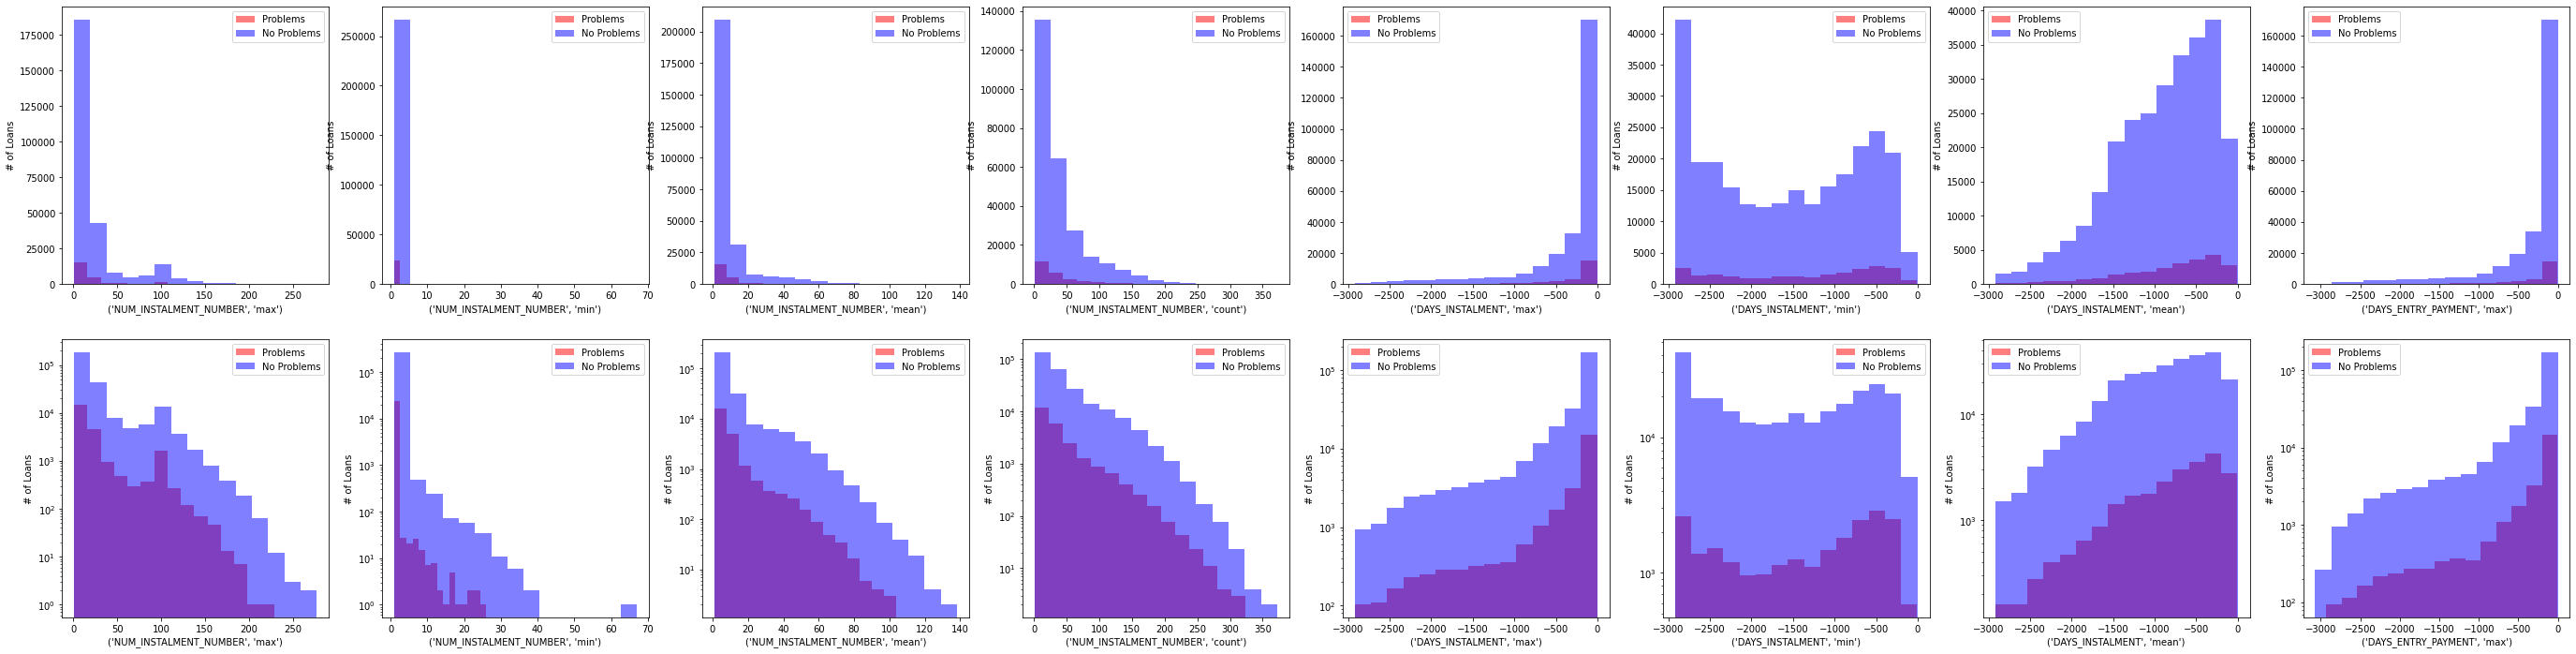

In [ ]:
fig, axs = plt.subplots(2, 8, figsize=(48,12))
for i in range(8):
  num_hist(temp_app, IP_df.columns[i], axs[0,i])

# log graphs
for i in range(8):
  num_hist(temp_app, IP_df.columns[i], axs[1,i], True)

None of these look very interesting. They all have uniform differences.

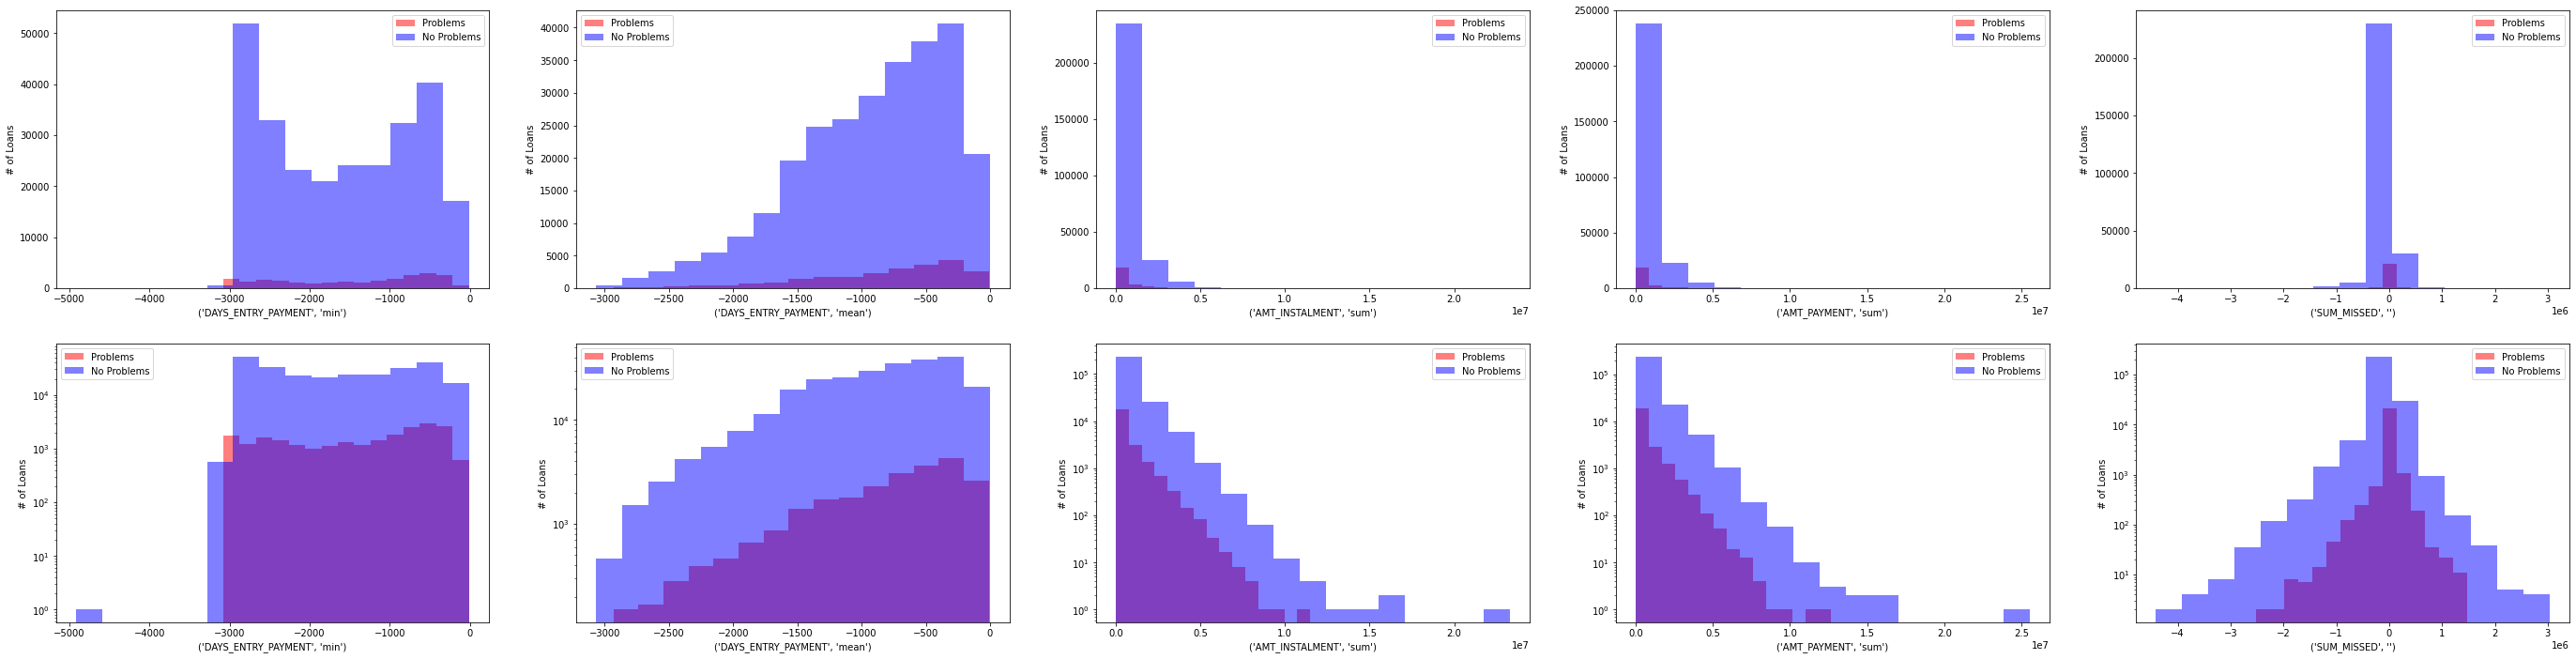

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(48,12))
for i in range(5):
  num_hist(temp_app, IP_df.columns[8+i], axs[0,i])

# log graphs
for i in range(5):
  num_hist(temp_app, IP_df.columns[8+i], axs[1,i], True)

These are also not very interesting.

### Correlations

In [ ]:
temp_app[list(IP_df.columns) + ["TARGET"]].corr()["TARGET"]

(NUM_INSTALMENT_NUMBER, max)      0.006304
(NUM_INSTALMENT_NUMBER, min)     -0.002334
(NUM_INSTALMENT_NUMBER, mean)    -0.009537
(NUM_INSTALMENT_NUMBER, count)   -0.021096
(DAYS_INSTALMENT, max)           -0.003231
(DAYS_INSTALMENT, min)            0.058648
(DAYS_INSTALMENT, mean)           0.043509
(DAYS_ENTRY_PAYMENT, max)        -0.002298
(DAYS_ENTRY_PAYMENT, min)         0.058794
(DAYS_ENTRY_PAYMENT, mean)        0.043992
(AMT_INSTALMENT, sum)            -0.019811
(AMT_PAYMENT, sum)               -0.024375
(SUM_MISSED, )                    0.027932
TARGET                            1.000000
Name: TARGET, dtype: float64

###Missing Values

In [ ]:
missing_vals(temp_app[IP_df.columns])

,Percent,Missing Count
"(DAYS_ENTRY_PAYMENT, mean)",5.16,15876
"(DAYS_ENTRY_PAYMENT, min)",5.16,15876
"(DAYS_ENTRY_PAYMENT, max)",5.16,15876
"(DAYS_INSTALMENT, mean)",5.16,15868
"(DAYS_INSTALMENT, min)",5.16,15868
"(DAYS_INSTALMENT, max)",5.16,15868
"(NUM_INSTALMENT_NUMBER, count)",5.16,15868
"(NUM_INSTALMENT_NUMBER, mean)",5.16,15868
"(NUM_INSTALMENT_NUMBER, min)",5.16,15868
"(NUM_INSTALMENT_NUMBER, max)",5.16,15868


These all have relatively low missing counts, so the correlation is probably fairly accurate.

##Bureau

In [ ]:
datasets['bureau'].columns

Index(['SK_ID_CURR', 'SK_ID_BUREAU', 'CREDIT_ACTIVE', 'CREDIT_CURRENCY',
       'DAYS_CREDIT', 'CREDIT_DAY_OVERDUE', 'DAYS_CREDIT_ENDDATE',
       'DAYS_ENDDATE_FACT', 'AMT_CREDIT_MAX_OVERDUE', 'CNT_CREDIT_PROLONG',
       'AMT_CREDIT_SUM', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM_LIMIT',
       'AMT_CREDIT_SUM_OVERDUE', 'CREDIT_TYPE', 'DAYS_CREDIT_UPDATE',
       'AMT_ANNUITY'],
      dtype='object')

In [219]:
datasets['installments_payments'].info()
datasets['installments_payments'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13605401 entries, 0 to 13605400
Data columns (total 8 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_PREV              int64  
 1   SK_ID_CURR              int64  
 2   NUM_INSTALMENT_VERSION  float64
 3   NUM_INSTALMENT_NUMBER   int64  
 4   DAYS_INSTALMENT         float64
 5   DAYS_ENTRY_PAYMENT      float64
 6   AMT_INSTALMENT          float64
 7   AMT_PAYMENT             float64
dtypes: float64(5), int64(3)
memory usage: 830.4 MB


,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
count,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360540e+07,1.360250e+07,1.360540e+07,1.360250e+07
mean,1.903365e+06,2.784449e+05,8.566373e-01,1.887090e+01,-1.042270e+03,-1.051114e+03,1.705091e+04,1.723822e+04
std,5.362029e+05,1.027183e+05,1.035216e+00,2.666407e+01,8.009463e+02,8.005859e+02,5.057025e+04,5.473578e+04
min,1.000001e+06,1.000010e+05,0.000000e+00,1.000000e+00,-2.922000e+03,-4.921000e+03,0.000000e+00,0.000000e+00
25%,1.434191e+06,1.896390e+05,0.000000e+00,4.000000e+00,-1.654000e+03,-1.662000e+03,4.226085e+03,3.398265e+03
50%,1.896520e+06,2.786850e+05,1.000000e+00,8.000000e+00,-8.180000e+02,-8.270000e+02,8.884080e+03,8.125515e+03
75%,2.369094e+06,3.675300e+05,1.000000e+00,1.900000e+01,-3.610000e+02,-3.700000e+02,1.671021e+04,1.610842e+04
max,2.843499e+06,4.562550e+05,1.780000e+02,2.770000e+02,-1.000000e+00,-1.000000e+00,3.771488e+06,3.771488e+06


In [ ]:
B_df = datasets['bureau'].groupby('SK_ID_CURR').agg({
    "CREDIT_TYPE":["max", "min"],
    "CREDIT_ACTIVE":["count", "max", "min"],
    "DAYS_CREDIT":["max", "min", "mean"],
    "CREDIT_DAY_OVERDUE":["max"],
    "AMT_CREDIT_SUM":["max"],
    "AMT_CREDIT_SUM_OVERDUE":["max"],
})

In [ ]:
temp_app = datasets['application_train'].merge(B_df, how='left', on='SK_ID_CURR')

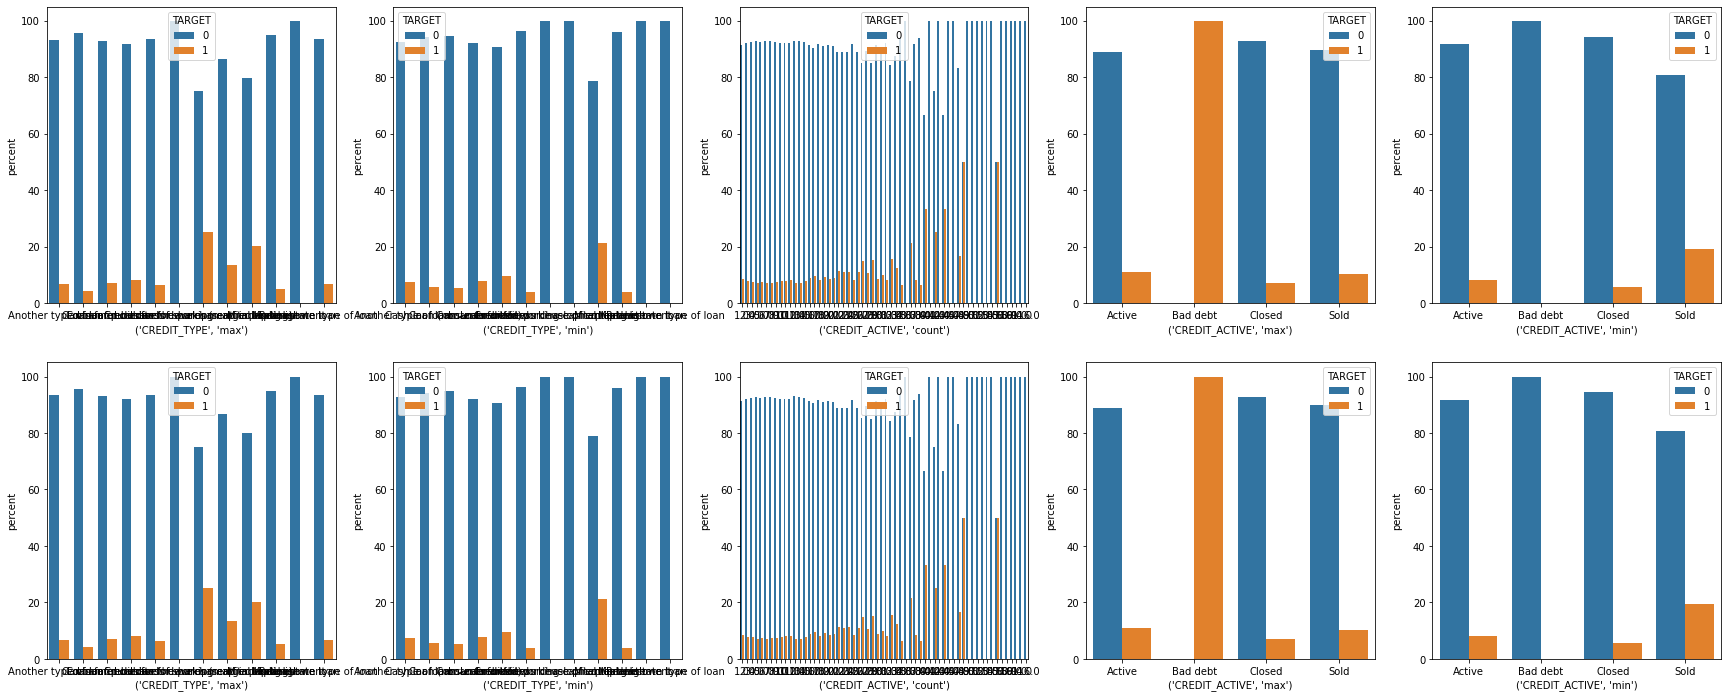

In [ ]:
fig, axs = plt.subplots(2, 5, figsize=(30,12))
for i in range(5):
  if B_df.columns[i][0] == 'CREDIT_ACTIVE' or B_df.columns[i][0] == 'CREDIT_TYPE':
    cat_bar(temp_app, B_df.columns[i], axs[0,i])
  else:
    num_hist(temp_app, B_df.columns[i], axs[0,i])

# log graphs
for i in range(5):
  if B_df.columns[i][0] == 'CREDIT_ACTIVE' or B_df.columns[i][0] == 'CREDIT_TYPE':
    cat_bar(temp_app, B_df.columns[i], axs[1,i])
  else:
    num_hist(temp_app, B_df.columns[i], axs[1,i], True)

All of the days_credit and credit_type graphs look fairly promising, as parts of the graphs show higher percent chances of problems over no problems compared to others. 

IndexError: ignored

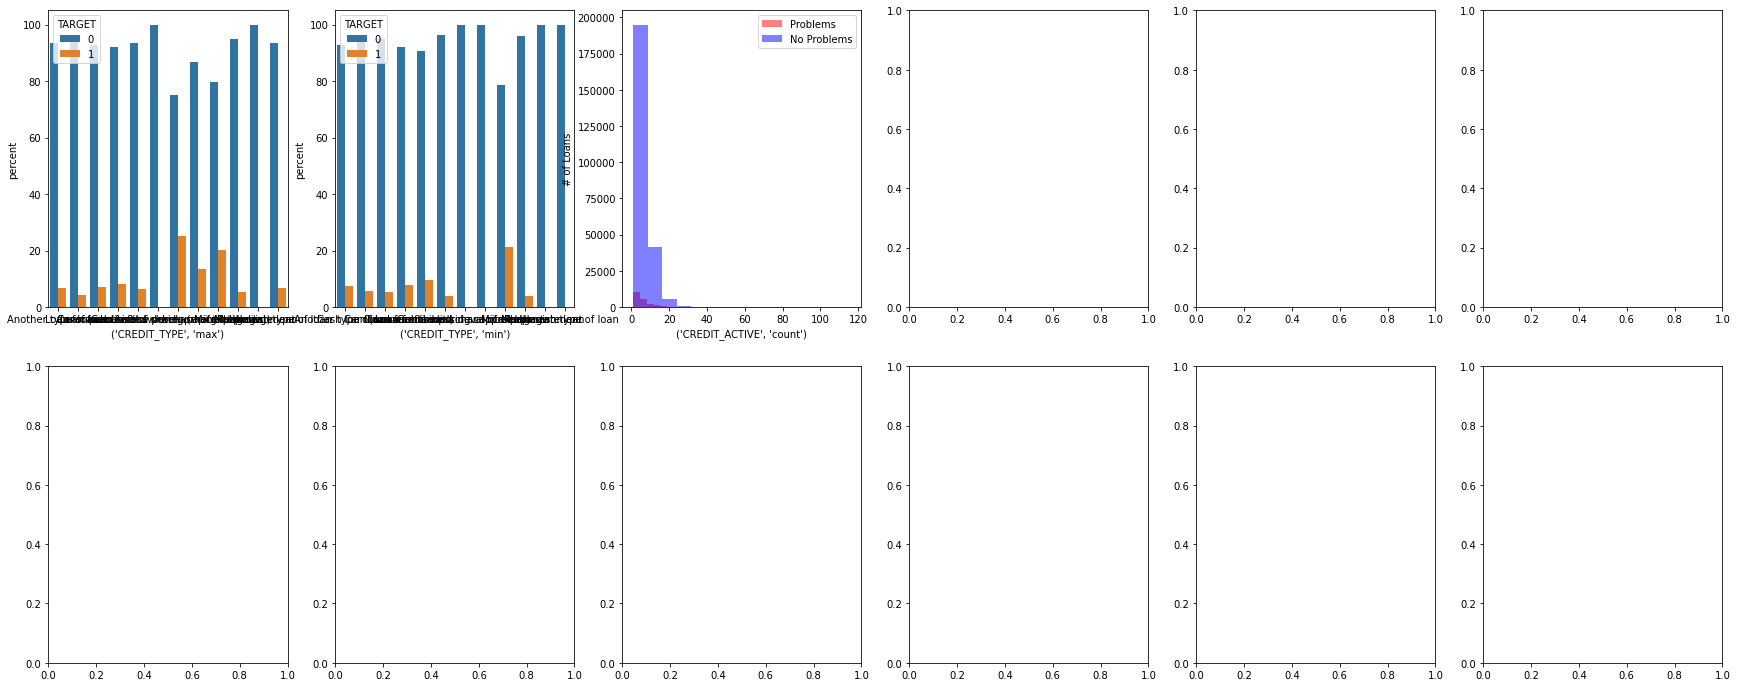

In [ ]:
fig, axs = plt.subplots(2, 6, figsize=(30,12))
for i in range(6):
  if B_df.columns[5+i][0] == 'CREDIT_ACTIVE' or B_df.columns[i][0] == 'CREDIT_TYPE':
    cat_bar(temp_app, B_df.columns[i], axs[0,i])
  else:
    num_hist(temp_app, B_df.columns[i], axs[0,i])

# log graphs
for i in range(6):
  if B_df.columns[5+i][0] == 'CREDIT_ACTIVE' or B_df.columns[i][0] == 'CREDIT_TYPE':
    cat_bar(temp_app, B_df.columns[i], axs[1,i])
  else:
    num_hist(temp_app, B_df.columns[i], axs[1,i], True)

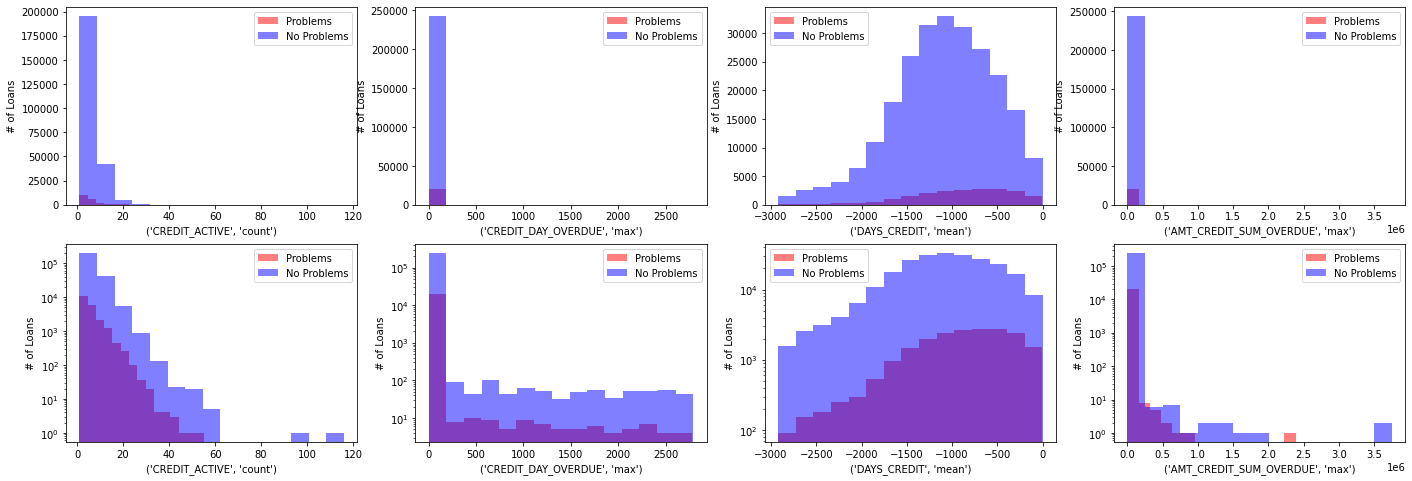

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(24, 8))
num_hist(temp_app, ('CREDIT_ACTIVE', 'count'), axs[0,0])
num_hist(temp_app, ('CREDIT_DAY_OVERDUE', 'max'), axs[0,1])
num_hist(temp_app, ('DAYS_CREDIT', 'mean'), axs[0,2])
num_hist(temp_app, ('AMT_CREDIT_SUM_OVERDUE', 'max'), axs[0,3])
# log graphs
num_hist(temp_app, ('CREDIT_ACTIVE', 'count'), axs[1,0], True)
num_hist(temp_app, ('CREDIT_DAY_OVERDUE', 'max'), axs[1,1], True)
num_hist(temp_app, ('DAYS_CREDIT', 'mean'), axs[1,2], True)
num_hist(temp_app, ('AMT_CREDIT_SUM_OVERDUE', 'max'), axs[1,3], True)

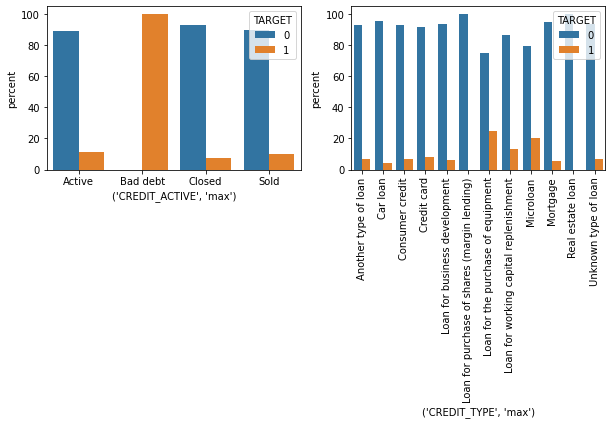

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
cat_bar(temp_app, ('CREDIT_ACTIVE', 'max'), axs[0])
plt.xticks(rotation=90)
cat_bar(temp_app, ('CREDIT_TYPE', 'max'), axs[1])

There are some clear trends here. In `CREDIT_ACTIVE`, the 'Closed' portaion had less problems than other groups. Also, everyone in the 'Bad debt' group had issues.

In `CREDIT_TYPE`, client who used their loan to purchase shares or real estate had no problems repaying, while those that used it for equipment, 'working capital replenishment', or a microloan all had significantly more issues repaying.

However, since these difference are so apparent, we should look at the number of samples for the interesting groups.

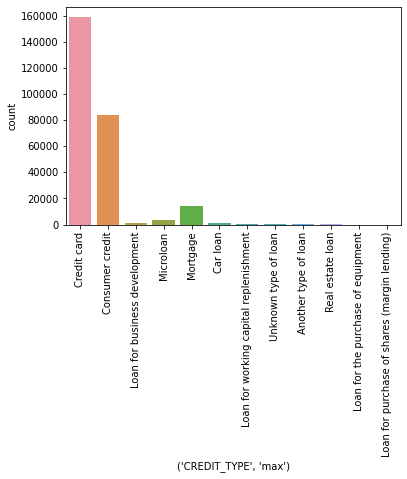

In [ ]:
plt.xticks(rotation=90)
sns.countplot(temp_app['CREDIT_TYPE', 'max'])

In [ ]:
len(temp_app.loc[temp_app[('CREDIT_ACTIVE', 'max')] == 'Bad debt'])

1

And, no surprise, but there's only one person in the 'Bad debt' category, rendering it almost useless.

In `CREDIT_TYPE`, it seems that the groups that were interesting to us didn't have a lot of samples, except 'Microloan', which is the 4th most popular category, but by a wide margin. This feature is probably still interesting to us, since the most popular type of loan is for 'Credit card' and that has a noticeably higher difficulty rate than 'Consumer credit' and 'Mortgage', the 2nd and 3rd most popular types, respectively.

Maybe we can group these into 'Credit card', 'Consumer credit', 'Mortgage', 'Other difficult', 'Other', where 'Other difficult' includes Microloans and others where clients had noticeably harder times repaying the loan

### Correlations

In [ ]:
temp_app[list(B_df.columns) + ["TARGET"]].corr()["TARGET"]

(CREDIT_ACTIVE, count)           0.004056
(DAYS_CREDIT, max)               0.049782
(DAYS_CREDIT, min)               0.075248
(DAYS_CREDIT, mean)              0.089729
(CREDIT_DAY_OVERDUE, max)        0.005493
(AMT_CREDIT_SUM, max)           -0.019737
(AMT_CREDIT_SUM_OVERDUE, max)    0.010614
TARGET                           1.000000
Name: TARGET, dtype: float64

As we can see from the correlations, `DAYS_CREDIT` is quite significant. 

###Missing Values

In [ ]:
missing_vals(temp_app[B_df.columns])

,Percent,Missing Count
"(AMT_CREDIT_SUM, max)",14.32,44021
"(AMT_CREDIT_SUM_OVERDUE, max)",14.31,44020
"(CREDIT_DAY_OVERDUE, max)",14.31,44020
"(DAYS_CREDIT, mean)",14.31,44020
"(DAYS_CREDIT, min)",14.31,44020
"(DAYS_CREDIT, max)",14.31,44020
"(CREDIT_ACTIVE, min)",14.31,44020
"(CREDIT_ACTIVE, max)",14.31,44020
"(CREDIT_ACTIVE, count)",14.31,44020
"(CREDIT_TYPE, min)",14.31,44020


There's a decent amount of data missing, but since we have ~85% of the data, it should still perform pretty well for most data

## Other Datasets


These are all of the aggregate datasets we want to get from each secondary file. 


In [ ]:
new_cat_features = [("CREDIT_ACTIVE", "max"), ("NAME_CONTRACT_STATUS", "max"), ("NAME_CLIENT_TYPE", "max"), ("NAME_YIELD_GROUP", "max")]
new_num_features = [("AMT_APPLICATION", "sum"), ("AMT_APPLICATION", "count"), ("CNT_INSTALLMENT_FUTURE", "max"), ("CNT_INSTALMENT", "count"), ("MONTHS_BALANCE", "max"), ("MONTHS_BALANCE", "mean"), ("AMT_CREDIT_LIMIT_ACTUAL", "max"), ("AMT_CREDIT_LIMIT_ACTUAL", "count"), ("AMT_BALANCE", "mean"), ("NUM_INSTALMENT_NUMBER", "max"), ("NUM_INSTALMENT_NUMBER", "count"), ("DAYS_INSTALMENT", "max"), ("DAYS_ENTRY_PAYMENT", "max"), ("CREDIT_ACTIVE", "count"), ("DAYS_CREDIT", "min"), ("CREDIT_DAYS_OVERDUE", "max"), ("AMT_CREDIT_SUM", "max"), ("AMT_CREDIT_SUM_OVERDUE", "max")]

# Combine Secondaries Into Application


In [ ]:
train = datasets['application_train'].merge(PA_df, how='left', on='SK_ID_CURR')
train = train.merge(PCB_df, how='left', on='SK_ID_CURR')
train = train.merge(CCB_df, how='left', on='SK_ID_CURR')
train = train.merge(IP_df, how='left', on='SK_ID_CURR')
train = train.merge(B_df, how='left', on='SK_ID_CURR')

test = datasets['application_test'].merge(PA_df, how='left', on='SK_ID_CURR')
test = test.merge(PCB_df, how='left', on='SK_ID_CURR')
test = test.merge(CCB_df, how='left', on='SK_ID_CURR')
test = test.merge(IP_df, how='left', on='SK_ID_CURR')
test = test.merge(B_df, how='left', on='SK_ID_CURR')

In [ ]:
train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,"(AMT_APPLICATION, sum)","(AMT_APPLICATION, count)","(NAME_CONTRACT_STATUS, max)","(NAME_CLIENT_TYPE, max)","(NAME_YIELD_GROUP, max)","(DAYS_TERMINATION, mean)","(CNT_INSTALMENT, count)","(CNT_INSTALMENT_FUTURE, max)","(MONTHS_BALANCE, max)","(MONTHS_BALANCE, mean)","(AMT_CREDIT_LIMIT_ACTUAL, max)","(AMT_CREDIT_LIMIT_ACTUAL, count)","(AMT_BALANCE, mean)","(NUM_INSTALMENT_NUMBER, max)","(NUM_INSTALMENT_NUMBER, count)","(DAYS_INSTALMENT, max)","(DAYS_ENTRY_PAYMENT, max)","(CREDIT_ACTIVE, count)","(CREDIT_ACTIVE, max)","(DAYS_CREDIT, min)","(CREDIT_DAY_OVERDUE, max)","(AMT_CREDIT_SUM, max)","(AMT_CREDIT_SUM_OVERDUE, max)"
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,179055.00,1.0,Approved,New,low_normal,-17.000000,19.0,24.0,-1.0,-10.000000,NaN,NaN,NaN,19.0,19.0,-25.0,-49.0,8.0,Closed,-1437.0,0.0,450000.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1306309.50,3.0,Approved,Repeater,middle,-1047.333333,28.0,12.0,-18.0,-43.785714,NaN,NaN,NaN,12.0,25.0,-536.0,-544.0,4.0,Closed,-2586.0,0.0,810000.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,24282.00,1.0,Approved,New,middle,-714.000000,4.0,4.0,-24.0,-25.500000,NaN,NaN,NaN,3.0,3.0,-724.0,-727.0,2.0,Closed,-1326.0,0.0,94537.8,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2449829.34,9.0,Refused,Repeater,middle,182481.750000,20.0,48.0,-1.0,-9.619048,270000.0,6.0,0.0,10.0,16.0,-11.0,-12.0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,903181.50,6.0,Approved,Repeater,middle,72143.800000,66.0,24.0,-1.0,-33.636364,NaN,NaN,NaN,17.0,66.0,-14.0,-14.0,1.0,Closed,-1149.0,0.0,146250.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Here we can see the top 20 most correlated features, and we can now see that several of the things added from the secondary datasets have been included. 


In [ ]:
correlations = train.corr()['TARGET'].sort_values()
print('Most Positive Correlations:\n', correlations.tail(10))
print('\nMost Negative Correlations:\n', correlations.head(10))

Most Positive Correlations:
 FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_WORK_CITY         0.050994
DAYS_ID_PUBLISH                0.051457
DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
(DAYS_CREDIT, min)             0.075248
DAYS_BIRTH                     0.078239
(AMT_BALANCE, mean)            0.087177
TARGET                         1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_3                       -0.178919
EXT_SOURCE_2                       -0.160472
EXT_SOURCE_1                       -0.155317
(AMT_CREDIT_LIMIT_ACTUAL, count)   -0.060481
DAYS_EMPLOYED                      -0.044932
FLOORSMAX_AVG                      -0.044003
FLOORSMAX_MEDI                     -0.043768
FLOORSMAX_MODE                     -0.043226
AMT_GOODS_PRICE                    -0.039645
REGION_POPULATION_RELATIVE         -0.037227
Name: TARGET, dtype: float64


# Secondary + Primary Data Base Pipeline

Now, let's put together a complete pipeline that includes our secondary data as well

The features used come from the features used in the first pipeline as well as any that had either high correlation or looked useful in graph form from our secondary data.

##Features Used

In [265]:
cat_features = [
  "FLAG_DOCUMENT_3", "REGION_RATING_CLIENT", "REGION_RATING_CLIENT_W_CITY",
  "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "HOUR_APPR_PROCESS_START",
  "OCCUPATION_TYPE",('CREDIT_TYPE', 'min'),('CREDIT_TYPE', 'max'),('CREDIT_ACTIVE', 'min'),
]

num_features = [
"EXT_SOURCE_3", "EXT_SOURCE_2", "EXT_SOURCE_1", "FLOORSMAX_AVG",
  "AMT_GOODS_PRICE", "REGION_POPULATION_RELATIVE",
  "ELEVATORS_AVG", "DAYS_LAST_PHONE_CHANGE", "DAYS_BIRTH", "DAYS_ID_PUBLISH",
'REGION_RATING_CLIENT_W_CITY' , 
('DAYS_CREDIT', 'min')      ,      
'DAYS_BIRTH'    ,                
('AMT_BALANCE', 'mean')  ,         
('DAYS_CREDIT', 'mean') ,
('AMT_CREDIT_LIMIT_ACTUAL', 'count'),
'DAYS_EMPLOYED',
('AMT_BALANCE', 'mean'),            
('MONTHS_BALANCE', 'min'),
('AMT_CREDIT_LIMIT_ACTUAL', 'count'),
]


##Pipeline

In [266]:

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

# custom layer to get columns we want from DataFrame
class DataFrameSelector(BaseEstimator, TransformerMixin):
  def __init__(self, attribute_names):
    self.attribute_names = attribute_names
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X[self.attribute_names].values

num_pipeline = Pipeline([
  ('selector', DataFrameSelector(num_features)),
  ('imputer', SimpleImputer(strategy='median')),
  ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
  ('selector', DataFrameSelector(cat_features)),
  ('imputer', SimpleImputer(strategy='most_frequent')),
  ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore")),
])

preprocess_pipeline = FeatureUnion(transformer_list=[
  ("num_pipeline", num_pipeline),
  ("cat_pipeline", cat_pipeline),
])

full_pipeline = Pipeline([
  ('preprocessing', preprocess_pipeline),
  ('linear', LogisticRegression())
])


##Fit Second Pipeline

In [267]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from time import time
X_train = train.loc[:, train.columns != "TARGET"]
y_train = train['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=30)

start = time()
full_pipeline.fit(X_train, y_train)
np.random.seed(42)

cv30Splits = ShuffleSplit(n_splits = 30, test_size = .3, random_state = 0)
logit_scores = cross_val_score(X=X_train,y = y_train, estimator = full_pipeline, cv=cv30Splits.split(X_train))                

logit_score_train = logit_scores.mean()
train_time = np.round(time() - start, 4)

# Time and score test predictions
start = time()
logit_score_test  = full_pipeline.score(X_test, y_test)
roc = roc_auc_score(y_test, full_pipeline.predict_proba(X_test)[:, 1])
test_time = np.round(time() - start, 4)

In [268]:
results.loc[1] = ["Baseline w/ All Data", roc,pct(logit_score_train), np.round(pct(logit_score_test),3), 
                   train_time, test_time, "Untuned LogisticRegression"]

In [269]:
results

,ExpID,ROC AUC Score,Cross fold train accuracy,Test Accuracy,Train Time(s),Test Time(s),Experiment description
0,Baseline,0.734214,92.0,91.7,178.7383,0.3048,Untuned LogisticRegression
1,Baseline w/ All Data,0.740142,92.0,91.7,223.1274,0.4201,Untuned LogisticRegression


This is a very slight improvement over our first pipeline, and places us 5563 on the public leaderboards.